<a href="https://colab.research.google.com/github/patrickmbouna/deep-learning-plants-deseases-classification/blob/main/AlexNet_Plant_Disease_Classification_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plant Disease Classification**

---

![alt text](https://cdn-images-1.medium.com/max/1200/1*FswlF4lZPQ4kT_gkybacZw.jpeg)


# Introduction

Getting affected by a disease is very common in plants due to various factors such as fertilizers, cultural practices followed, environmental conditions, etc. These diseases hurt agricultural yield and eventually the economy based on it. 

Any technique or method to overcome this problem and getting a warning before the plants are infected would aid farmers to efficiently cultivate crops or plants, both qualitatively and quantitatively. Thus, disease detection in plants plays a very important role in agriculture.


# Download Dataset


First, we download the `PlantVillage` dataset from Google Drive by using the unique `id` it holds and unzip the downloaded **PlantVillage.zip** into the **PlantVillage** dataset folder.

In [ ]:
# Download a file based on its file ID.
file_id = '18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn'

# Download dataset
!gdown https://drive.google.com/uc?id={file_id}

# Unzip the downloaded file
!unzip -q PlantVillage.zip

Downloading...
From: https://drive.google.com/uc?id=18DbC6Xj4NP-hLzI14WuMaAEyq482vNfn
To: /content/PlantVillage.zip
866MB [00:08, 99.5MB/s]


# Import Libraries


Importing necessary libraries and modules required to build the classification model.

In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
# Building CNN based on AlexNet Architecture

# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
import json
import time

import joblib
import keras
import tensorflow
from keras.engine.saving import load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D
from keras import models
from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
#from keras.callbacks import tensorboard_v1

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

ImportError: cannot import name 'image_dataset_from_directory' from 'tensorflow.keras.preprocessing' (C:\Users\aristidemima\Anaconda3\lib\site-packages\tensorflow_core\python\keras\api\_v1\keras\preprocessing\__init__.py)

# Load Dataset

Initializing a few parameters required for the image dataset preprocessing.

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((224, 224))

# Number of images used to train the model
N_IMAGES = 100

# Path to the dataset folder
root_dir = './PlantVillage'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 39, activation = 'softmax'))
classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
______________________________________

In [ ]:
# Compiling the CNN
# classifier.compile(optimizer='adam',
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])


# Compiling the CNN

classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])




In [ ]:

# image preprocessing
#train_datagen = ImageDataGenerator(rescale=1./255,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   rotation_range=40,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest')

#test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_data_dir = train_dir   # directory of training data

test_data_dir = val_dir      # directory of test data

#training_set = train_datagen.flow_from_directory(train_data_dir,
#                                                 target_size=(224, 224),
#                                                 batch_size=batch_size,
#                                                 class_mode='categorical')

#test_set = test_datagen.flow_from_directory(test_data_dir,
#                                            target_size=(224, 224),
#                                            batch_size=batch_size,
#                                            class_mode='categorical')

#print(training_set.class_indices)



In [ ]:
LEARNING_RATE=0.01
MOMENTUM=0.9
ALPHA=0.0001
BETA=0.75
GAMMA=0.1
DROPOUT=0.4
WEIGHT_DECAY=0.0005
LRN2D_NORM=True
DATA_FORMAT='channels_last' # Theano:'channels_first' Tensorflow:'channels_last'
USE_BN=True

IM_WIDTH=224
IM_HEIGHT=224
EPOCH=200
batch_size=32
NB_CLASS=39

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3,
    rescale=1./255
)
training_set = datagen.flow_from_directory(
  train_data_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='training'
)
#vaild data
test_set = datagen.flow_from_directory(
  train_data_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='validation'
)
#test data
test_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    featurewise_center=True
)
test_generator = datagen.flow_from_directory(
  test_data_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
)

Found 30827 images belonging to 39 classes.
Found 13189 images belonging to 39 classes.
Found 11004 images belonging to 39 classes.


In [ ]:
print(training_set.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
import tensorflow as tf

In [ ]:
#val_batches = tf.data.experimental.cardinality(test_data_dir)
#test_dataset = validation_dataset.take(val_batches // 5)
#test_data_dir  = validation_dataset.skip(val_batches // 5)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_data_dir = train_data_dir.prefetch(buffer_size=AUTOTUNE)
#test_data_dir = test_data_dir.prefetch(buffer_size=AUTOTUNE)
#test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# # checkpoint
# weightpath = "weights_1.hdf5"
# checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]
#
#
# #fitting images to CNN
# history = classifier.fit_generator(training_set,
#                          steps_per_epoch=training_set.samples//batch_size,
#                          validation_data=test_set,
#                          epochs=50,
#                          validation_steps=test_set.samples//batch_size,
#                          callbacks=callbacks_list)


#fitting images to CNN
history = classifier.fit_generator(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=50,
                                   validation_steps=test_set.samples//batch_size)




Epoch 1/50
963/963 [==============================] - 1696s 2s/step - loss: 2.9744 - accuracy: 0.2664 - val_loss: 2.4907 - val_accuracy: 0.3490
Epoch 2/50
963/963 [==============================] - 2753s 3s/step - loss: 2.3523 - accuracy: 0.3855 - val_loss: 2.0708 - val_accuracy: 0.4860
Epoch 3/50
963/963 [==============================] - 1357s 1s/step - loss: 2.1145 - accuracy: 0.4297 - val_loss: 1.3276 - val_accuracy: 0.5100
Epoch 4/50
963/963 [==============================] - 882s 916ms/step - loss: 1.9672 - accuracy: 0.4640 - val_loss: 1.3139 - val_accuracy: 0.5456
Epoch 5/50
963/963 [==============================] - 730s 758ms/step - loss: 1.8911 - accuracy: 0.4800 - val_loss: 1.4509 - val_accuracy: 0.5813
Epoch 6/50
963/963 [==============================] - 561s 582ms/step - loss: 1.8200 - accuracy: 0.4929 - val_loss: 1.2323 - val_accuracy: 0.5940
Epoch 7/50
963/963 [==============================] - 905s 939ms/step - loss: 1.7597 - accuracy: 0.5065 - val_loss: 2.1724 - val_

In [ ]:
#saving model
filepath="model.hdf5"
classifier.save(filepath)

In [ ]:

loss,acc=classifier.evaluate_generator(test_generator,steps=test_set.n/batch_size)


In [ ]:
print('Test result:loss:%f,acc:%f'%(loss,acc))

Test result:loss:1.036845,acc:0.733197


Comparing the accuracy and loss by plotting the graph for training and validation.

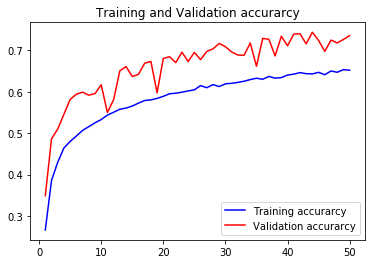

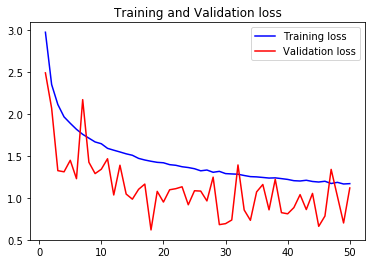

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

convert modèle to tensorflow js

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras "model.hdf5" /content/jj

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format keras "model.hdf5" /content/jj